In [1]:
library(ComplexHeatmap)
library(ggplot2)
library(tidyr)
library(dplyr)

# set working directory
setwd("/lustre/home/reynaj/Projects/20241011.Byrd_Lab.IBD_NuLisa")

# set the outdir
outdir = "results/aggregated/post_analysis/"

Loading required package: grid



## Load the datasets

In [ ]:
fn <- "results/specimen_focused/comp_data/protein_levels.npq.tsv"
protein_data <- read.table(fn, header=TRUE, check.names=FALSE, sep = "\t")

fn <- "results/specimen_focused/comp_data/clinical_data.tsv"
clinical_data <- read.table(fn, header=TRUE, sep="\t")

# mod the ibd data
clinical_data$ibd_diagnosis <- factor(clinical_data$ibd_diagnosis, 
                                      levels = c("Alamar_Sample_Control", "Control", "CD", "UC", "IBD-U"))
clinical_data$ibd_indicator <- factor(clinical_data$ibd_indicator,
                                      levels = c("Control Super Group", "IBD Super Group"))

# mod the disease activity data
clinical_data$disease_activity <- factor(clinical_data$disease_activity, 
                                         levels = c("N/A", "N/A (Non-IBD Control)",
                                                    "Quiescent", "Mild", "Moderate"))
clinical_data$disease_activity_indicator <- factor(clinical_data$disease_activity_indicator,
                                                   levels=c("In-active Disease", "Active Disease"))

In [ ]:
# load the important features
model_imp_df <- read.table('results/specimen_focused/rf_model/rf_model.disease_activity.scores.tsv',
                            sep='\t', header=TRUE)

In [ ]:
topn = 30
model_imp_df <- model_imp_df %>% arrange(desc(score))
model_imp_df <- model_imp_df[0:topn,]

In [ ]:
protein_data <- protein_data[row.names(protein_data) %in% model_imp_df$protein,]

## Run hierarchical clustering on all samples

gTree[GRID.gTree.842] 

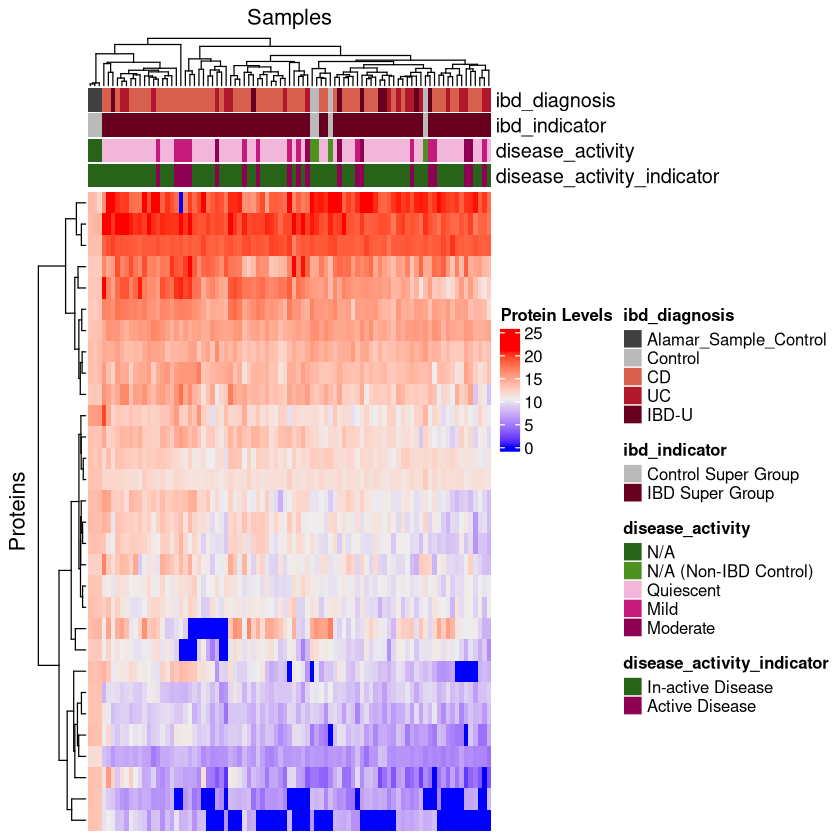

In [ ]:
# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=11
ha_ibd <- HeatmapAnnotation(ibd_diagnosis = clinical_data$ibd_diagnosis,
                        col = list(ibd_diagnosis = c("Alamar_Sample_Control" = "#404040",
                                                     "Control" = "#bababa",
                                                     "CD" = "#d6604d",
                                                     "UC" = "#b2182b",
                                                     "IBD-U" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
ha_ibd_idx <- HeatmapAnnotation(ibd_indicator = clinical_data$ibd_indicator,
                        col = list(ibd_indicator = c("Control Super Group" = "#bababa", "IBD Super Group" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=5
ha_da <- HeatmapAnnotation(disease_activity = clinical_data$disease_activity, 
                        col = list(disease_activity = c("N/A" = "#276419",
                                                        "N/A (Non-IBD Control)" = "#4d9221",
                                                        "Quiescent" = "#f1b6da",
                                                        "Mild" = "#c51b7d",
                                                        "Moderate" = "#8e0152")))

# Create a heatmap annotation for the diagnosis
ha_da_idx <- HeatmapAnnotation(disease_activity_indicator = clinical_data$disease_activity_indicator, 
                        col = list(disease_activity_indicator = c("In-active Disease" = "#276419", "Active Disease" = "#8e0152")))


combined_ha = c(ha_ibd, ha_ibd_idx, ha_da, ha_da_idx) 

ht <- Heatmap(as.matrix(protein_data),
        name = "Protein Levels",
        row_title = "Proteins",
        column_title = "Samples",
        cluster_rows = TRUE,
        cluster_columns = TRUE,
        show_row_names = FALSE,
        show_column_names = FALSE,
        column_labels = clinical_data$ibd_indicator,
        top_annotation = combined_ha)

# Draw the heatmap and add a main title
ht_list <- draw(ht, heatmap_legend_side = "right", 
     annotation_legend_side = "right")

ht_grob <- grid.grabExpr(draw(ht_list))
fn = file.path(outdir, "samples.all_data.hierarchical_clustering.png")
ggsave(fn, plot = ht_grob, width = 8, height = 6); ht_grob;

## Run hierarchical clustering on Crohn's samples only

gTree[GRID.gTree.5814] 

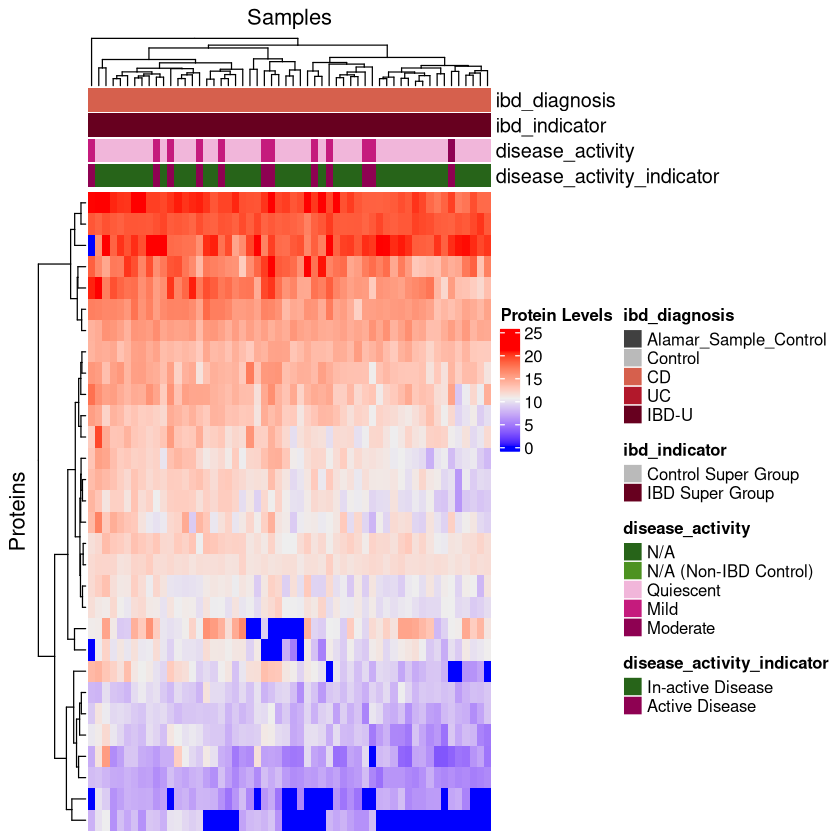

In [ ]:
crohn_clinical_data <- clinical_data[clinical_data$ibd_diagnosis == "CD",]
crohn_protein_data <- protein_data[, crohn_clinical_data$sample_id]

clinical_df <- crohn_clinical_data
protein_df <- crohn_protein_data

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=11
ha_ibd <- HeatmapAnnotation(ibd_diagnosis = clinical_df$ibd_diagnosis,
                            col = list(ibd_diagnosis = c("Alamar_Sample_Control" = "#404040",
                                                         "Control" = "#bababa",
                                                         "CD" = "#d6604d",
                                                         "UC" = "#b2182b",
                                                         "IBD-U" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
ha_ibd_idx <- HeatmapAnnotation(ibd_indicator = clinical_df$ibd_indicator,
                                col = list(ibd_indicator = c("Control Super Group" = "#bababa", "IBD Super Group" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=5
ha_da <- HeatmapAnnotation(disease_activity = clinical_df$disease_activity, 
                           col = list(disease_activity = c("N/A" = "#276419",
                                                           "N/A (Non-IBD Control)" = "#4d9221",
                                                           "Quiescent" = "#f1b6da",
                                                           "Mild" = "#c51b7d",
                                                           "Moderate" = "#8e0152")))

# Create a heatmap annotation for the diagnosis
ha_da_idx <- HeatmapAnnotation(disease_activity_indicator = clinical_df$disease_activity_indicator, 
                               col = list(disease_activity_indicator = c("In-active Disease" = "#276419", "Active Disease" = "#8e0152")))


combined_ha = c(ha_ibd, ha_ibd_idx, ha_da, ha_da_idx) 

ht <- Heatmap(as.matrix(protein_df),
              name = "Protein Levels",
              row_title = "Proteins",
              column_title = "Samples",
              cluster_rows = TRUE,
              cluster_columns = TRUE,
              show_row_names = FALSE,
              show_column_names = FALSE,
              column_labels = clinical_df$ibd_indicator,
              top_annotation = combined_ha)


# Draw the heatmap and add a main title
ht_list <- draw(ht, heatmap_legend_side = "right", 
                annotation_legend_side = "right")


ht_grob <- grid.grabExpr(draw(ht_list))
fn = file.path(outdir, "samples.crohns_data.hierarchical_clustering.png")
ggsave(fn, plot = ht_grob, width = 8, height = 6); ht_grob;

## Run hierarchical clustering on ulcerative colitis samples only

gTree[GRID.gTree.2889] 

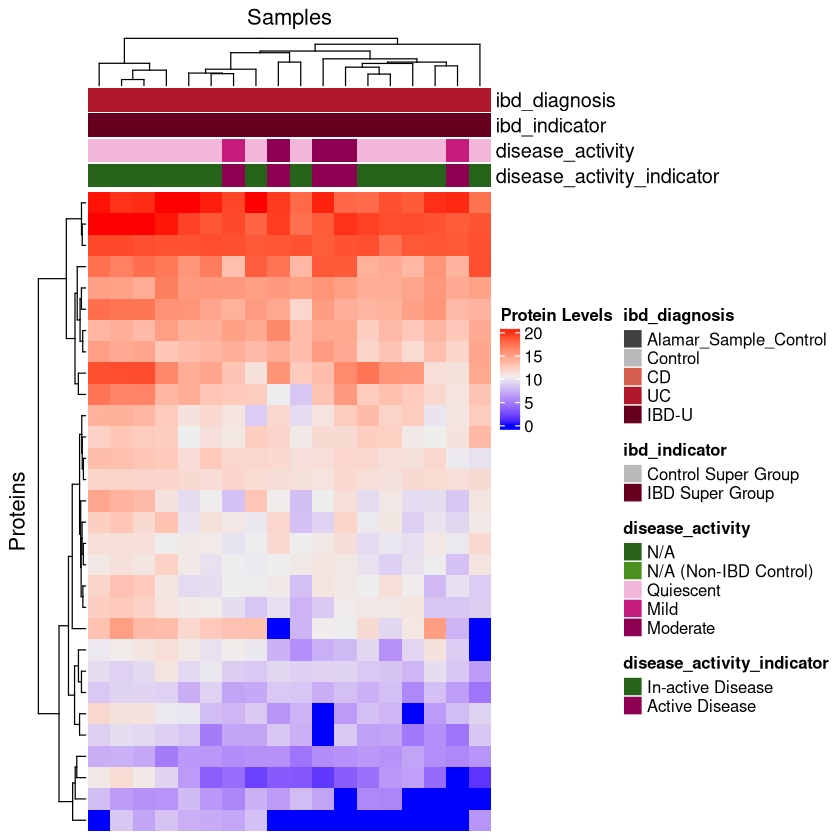

In [ ]:
crohn_clinical_data <- clinical_data[clinical_data$ibd_diagnosis == "UC",]
crohn_protein_data <- protein_data[, crohn_clinical_data$sample_id]

clinical_df <- crohn_clinical_data
protein_df <- crohn_protein_data

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=11
ha_ibd <- HeatmapAnnotation(ibd_diagnosis = clinical_df$ibd_diagnosis,
                            col = list(ibd_diagnosis = c("Alamar_Sample_Control" = "#404040",
                                                         "Control" = "#bababa",
                                                         "CD" = "#d6604d",
                                                         "UC" = "#b2182b",
                                                         "IBD-U" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
ha_ibd_idx <- HeatmapAnnotation(ibd_indicator = clinical_df$ibd_indicator,
                                col = list(ibd_indicator = c("Control Super Group" = "#bababa", "IBD Super Group" = "#67001f")), which="column")

# Create a heatmap annotation for the diagnosis
# color brewer - https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=5
ha_da <- HeatmapAnnotation(disease_activity = clinical_df$disease_activity, 
                           col = list(disease_activity = c("N/A" = "#276419",
                                                           "N/A (Non-IBD Control)" = "#4d9221",
                                                           "Quiescent" = "#f1b6da",
                                                           "Mild" = "#c51b7d",
                                                           "Moderate" = "#8e0152")))

# Create a heatmap annotation for the diagnosis
ha_da_idx <- HeatmapAnnotation(disease_activity_indicator = clinical_df$disease_activity_indicator, 
                               col = list(disease_activity_indicator = c("In-active Disease" = "#276419", "Active Disease" = "#8e0152")))


combined_ha = c(ha_ibd, ha_ibd_idx, ha_da, ha_da_idx) 

ht <- Heatmap(as.matrix(protein_df),
              name = "Protein Levels",
              row_title = "Proteins",
              column_title = "Samples",
              cluster_rows = T,
              cluster_columns = T,
              show_row_names = FALSE,
              show_column_names = FALSE,
              column_labels = clinical_df$ibd_indicator,
              top_annotation = combined_ha)


# Draw the heatmap and add a main title
ht_list <- draw(ht, heatmap_legend_side = "right", 
                annotation_legend_side = "right")

ht_grob <- grid.grabExpr(draw(ht_list))
fn = file.path(outdir, "samples.ulcerative_colitis_data.hierarchical_clustering.png")
ggsave(fn, plot = ht_grob, width = 8, height = 6); ht_grob;